## Loss functions
Loss function is used to measure the accuracy of a model. The goal of a model is to minimize the loss function.

It measures the difference between the predicted output and the actual output.

Types of loss functions:

1. Mean square error
    commonly used regression
2. Mean absolute error
    commonly used for regression
3. Cross entropy
    Commonly used for classification problems
        i. Binary cross entropy
        ii.Categorical cross entropy 

In [1]:
def mean_squared_error(predicted_values, actual_values):
    """
    Calculates the mean squared error (MSE) for a set of predicted values and actual values.

    Parameters:
        predicted_values (list or array): The predicted values.
        actual_values (list or array): The actual values.

    Returns:
        float: The mean squared error.
    """
    # calculate the squared difference between predicted and actual values
    squared_differences = [(pred - act) ** 2 for pred, act in zip(predicted_values, actual_values)]
    # calculate the mean of the squared differences
    mse = sum(squared_differences) / len(squared_differences)
    return mse

In [2]:
def mean_absolute_error(predicted_values, actual_values):

    # calculate the absolute difference between predicted and actual values
    absolute_differences = [abs(pred - act) for pred, act in zip(predicted_values, actual_values)]
    # calculate the mean of the absolute differences
    mae = sum(absolute_differences) / len(absolute_differences)
    return mae

In [ ]:
import numpy as np

def cross_entropy(y_pred, y_true):
    """
    Calculates the cross-entropy loss.

    Parameters:
        y_pred (array-like): The predicted probabilities.
        y_true (array-like): The true labels.

    Returns:
        float: The cross-entropy loss.
    """
    # ensure that the predicted probabilities are in the range [0, 1]
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # calculate the cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss

## Optimizers
It adjust the model's parameters to minimize the loss function. Commonly usedoptimisers are:

- Gradient descent: It adjust the modl's parameters by taking the derivative of the loss function with respect to the parameters and updating tha parameters in the direction ofthe negative gradient. Can be slow to converge when the loss function has many local minima


- Stochastic gradient Descent(SGD): SGD is an extension of gradient descent. It updates the model’s parameters after each training sample, rather than after each epoch. This makes it faster to converge, but it can also make the optimization process more unstable. Stochastic gradient descent is often used for problems with a large amount of data.


- Adaptive Moment Estimation(Adam)

Adaptive Moment Estimation (Adam)
Adam is an optimizer that combines the advantages of gradient descent and SGD. It uses the first and second moments of the gradients to adjust the learning rate adaptively. Adam is generally considered to be one of the best optimizers for deep learning.

### Gradient Descent

The figure below shows how gradient descent works on this function.

The circles are the contours of this function. If we move along a contour, the function value would not change and would remain a constant.

This is opposed to the direction of the gradient, where the function changes at a maximum rate. Therefore the direction of the gradient of the function at any point is normal to the contour's tangent at that point.

In simple terms, the gradient can be taken as an arrow which points in the direction where the function changes the most.

Following the negative gradient direction would lead to points where the function value decreases at a maximum rate. The learning rate, also called the step size, dictates how fast or slow, we move along the direction of the gradient.



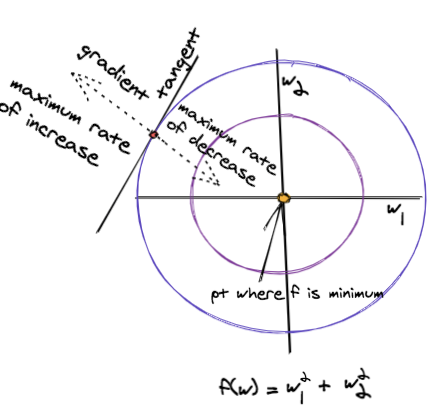

In [ ]:

def gradient_descent(model, X, y, learning_rate, num_iterations):
    """
    Optimizes model parameters using gradient descent.

    Parameters:
        model (object): The machine learning model to be optimized.
        X (array-like): The input data for the model.
        y (array-like): The target values for the model.
        learning_rate (float): The learning rate for the optimizer.
        num_iterations (int): The number of iterations for the optimizer.

    Returns:
        object: The optimized model.
    """
    # obtain the number of training examples
    m = X.shape[0]

    for i in range(num_iterations):
        # make predictions using the current model parameters
        y_pred = model.predict(X)

        # calculate gradients
        grads = model.gradient(X, y, y_pred)

        # update model parameters
        for j in range(len(model.params)):
            model.params[j] = model.params[j] - learning_rate * grads[j] / m

    return model

In [ ]:
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history